In [124]:
import numpy as np
import pandas as pd

In [125]:
#!conda install -c anaconda xlrd --yes

In [126]:
#pip install xlrd

In [127]:
#pip install openpyxl

In [128]:
df_c = pd.read_csv(r'C:\\Users\Erika Winckler\Downloads\archive (1)\rideshare_kaggle.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [129]:
df_c.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [130]:
# df.to_excel("data tubes.xlsx")

# **Preprocessing**

- cleansing (missing value, cek valid data)
- cek type data
- analisis tiap columns

In [131]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [132]:
# Drop columns
df = df_c.drop(['id', 'datetime', 'timezone', 'product_id', 'latitude', 'longitude', 'icon'], axis=1)

In [133]:
df.shape

(693071, 50)

In [134]:
df.isna().sum()
# Nan  = null

timestamp                          0
hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
a

**Handle Duplikat**

In [135]:
df.duplicated().sum()
# tidak ada data duplikat

1660

**Handle Field Price (Data tidak valid)**

In [136]:
df['price'].unique()

array([ 5.  , 11.  ,  7.  , 26.  ,  9.  , 16.5 , 10.5 ,  3.  , 27.5 ,
       13.5 , 12.  , 16.  ,  7.5 ,  5.5 ,   nan,  3.5 ,  8.5 , 15.  ,
       20.5 , 19.5 , 29.5 ,  9.5 , 22.  , 13.  , 17.  , 10.  , 34.  ,
       18.5 , 36.  , 22.5 , 32.5 , 25.  , 27.  , 35.  ,  8.  , 23.5 ,
       14.  , 26.5 , 38.5 , 23.  , 30.5 , 17.5 , 30.  , 36.5 , 12.5 ,
       33.5 , 21.5 , 38.  , 18.  , 33.  , 32.  ,  6.5 , 11.5 , 31.5 ,
       28.5 , 24.  , 29.  , 31.  , 42.5 , 41.  , 19.  , 52.5 , 67.5 ,
       15.5 , 21.  , 45.5 , 28.  , 37.5 , 14.5 , 47.5 ,  4.5 , 40.5 ,
       55.  , 42.  , 46.5 , 50.5 , 24.5 , 41.5 , 56.  , 25.5 , 39.  ,
       57.5 , 20.  , 39.5 ,  6.  , 35.5 , 48.5 , 37.  , 45.  , 44.  ,
       34.5 ,  2.5 , 46.  , 48.  , 47.  , 54.  , 52.  , 62.  , 43.  ,
       43.5 , 80.  , 65.  , 51.5 , 40.  , 49.5 , 58.  , 75.  , 62.5 ,
       92.  , 87.  , 64.5 , 87.5 , 73.5 , 44.5 , 80.5 , 89.  , 53.  ,
       81.5 , 60.5 , 49.  , 53.5 , 51.  , 55.5 , 37.85, 59.  , 18.35,
       54.5 , 76.  ,

In [137]:
df['price'].mean()

16.545125490614065

In [138]:
price_mean = round(df['price'].mean(),2)
df['price'] = df['price'].replace(np.nan, price_mean)

In [139]:
df['price'].unique()

array([ 5.  , 11.  ,  7.  , 26.  ,  9.  , 16.5 , 10.5 ,  3.  , 27.5 ,
       13.5 , 12.  , 16.  ,  7.5 ,  5.5 , 16.55,  3.5 ,  8.5 , 15.  ,
       20.5 , 19.5 , 29.5 ,  9.5 , 22.  , 13.  , 17.  , 10.  , 34.  ,
       18.5 , 36.  , 22.5 , 32.5 , 25.  , 27.  , 35.  ,  8.  , 23.5 ,
       14.  , 26.5 , 38.5 , 23.  , 30.5 , 17.5 , 30.  , 36.5 , 12.5 ,
       33.5 , 21.5 , 38.  , 18.  , 33.  , 32.  ,  6.5 , 11.5 , 31.5 ,
       28.5 , 24.  , 29.  , 31.  , 42.5 , 41.  , 19.  , 52.5 , 67.5 ,
       15.5 , 21.  , 45.5 , 28.  , 37.5 , 14.5 , 47.5 ,  4.5 , 40.5 ,
       55.  , 42.  , 46.5 , 50.5 , 24.5 , 41.5 , 56.  , 25.5 , 39.  ,
       57.5 , 20.  , 39.5 ,  6.  , 35.5 , 48.5 , 37.  , 45.  , 44.  ,
       34.5 ,  2.5 , 46.  , 48.  , 47.  , 54.  , 52.  , 62.  , 43.  ,
       43.5 , 80.  , 65.  , 51.5 , 40.  , 49.5 , 58.  , 75.  , 62.5 ,
       92.  , 87.  , 64.5 , 87.5 , 73.5 , 44.5 , 80.5 , 89.  , 53.  ,
       81.5 , 60.5 , 49.  , 53.5 , 51.  , 55.5 , 37.85, 59.  , 18.35,
       54.5 , 76.  ,

# **EDA (EXPLORATORY DATA ANALYST)**

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   source                       693071 non-null  object 
 5   destination                  693071 non-null  object 
 6   cab_type                     693071 non-null  object 
 7   name                         693071 non-null  object 
 8   price                        693071 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  temperature                  693071 non-null  float64
 12  apparentTemperature          693071 non-null  float64
 13 

In [141]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545513,2.189430,1.013870,39.584388,35.881222,0.008922,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,8.946069,1.138937,0.091641,6.726084,7.918707,0.026901,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,12.130000,0.000000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.500000,1.280000,1.000000,36.450000,31.910000,0.000000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,16.000000,2.160000,1.000000,40.490000,35.900000,0.000000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,43.580000,40.080000,0.000000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,57.220000,0.144700,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


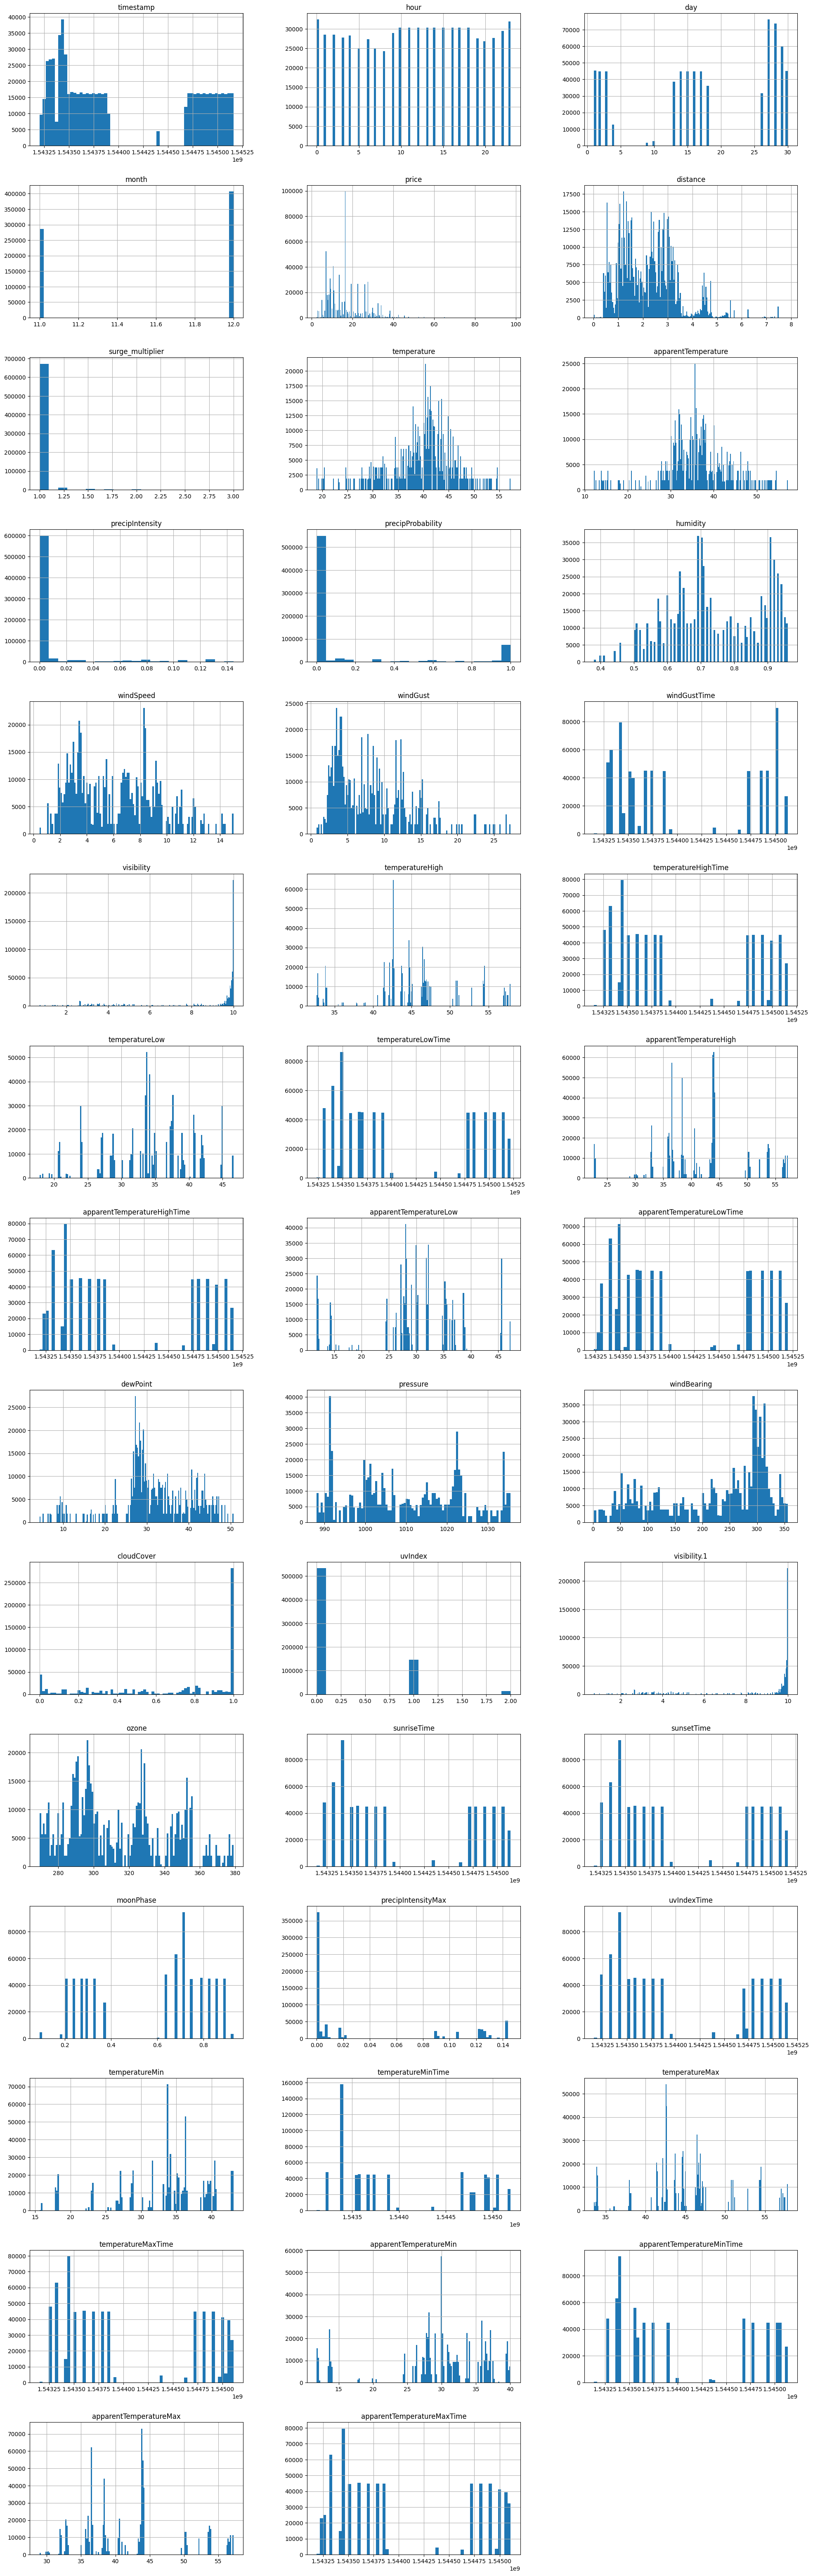

In [85]:
# Melihat distribusi frekuensi
df.hist(bins='auto',layout=(15,3), figsize=(24,80));

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# describe atttribute categorical
df_categorical = df[['source', 'destination', 'cab_type','name','short_summary','long_summary']]
df_categorical.describe()

,source,destination,cab_type,name,short_summary,long_summary
count,693071,693071,693071,693071,693071,693071
unique,12,12,2,13,9,11
top,Financial District,Financial District,Uber,UberXL,Overcast,Mostly cloudy throughout the day.
freq,58857,58851,385663,55096,218895,202340


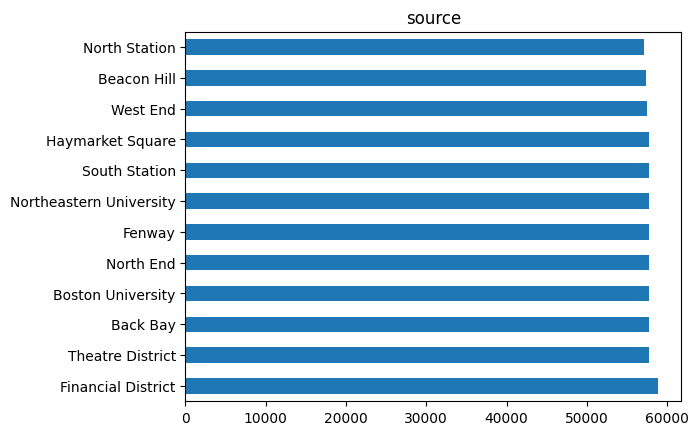

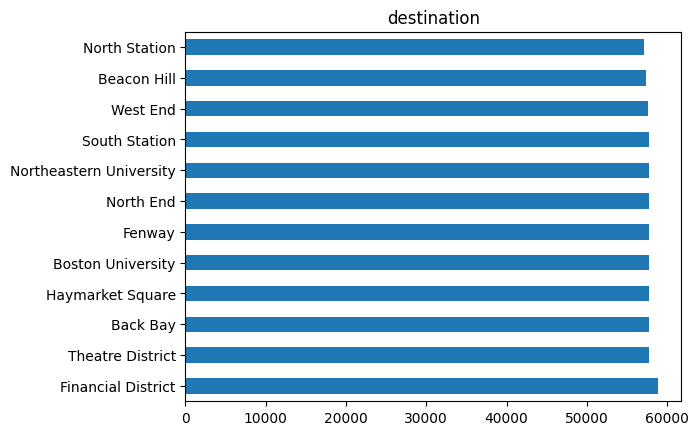

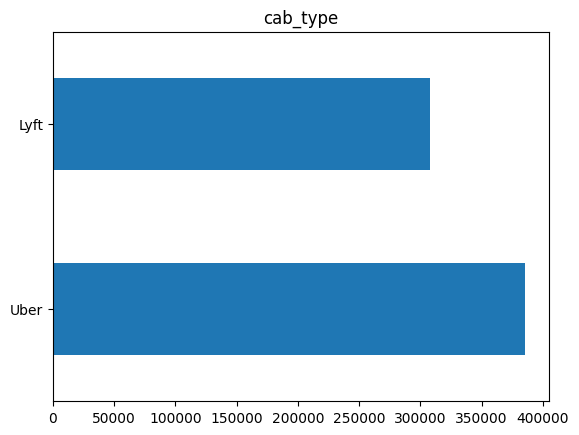

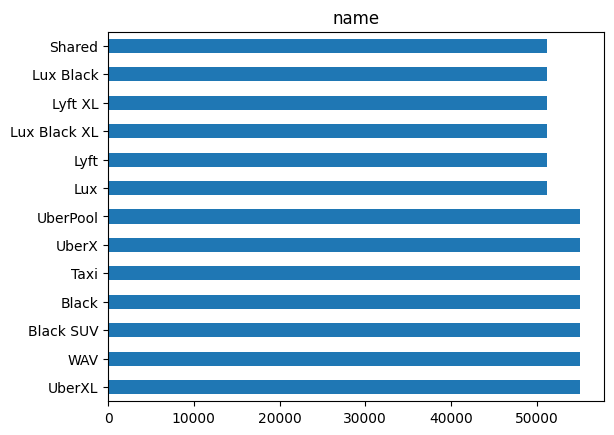

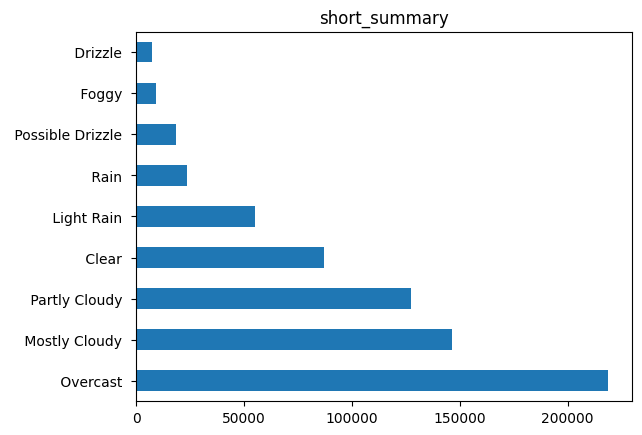

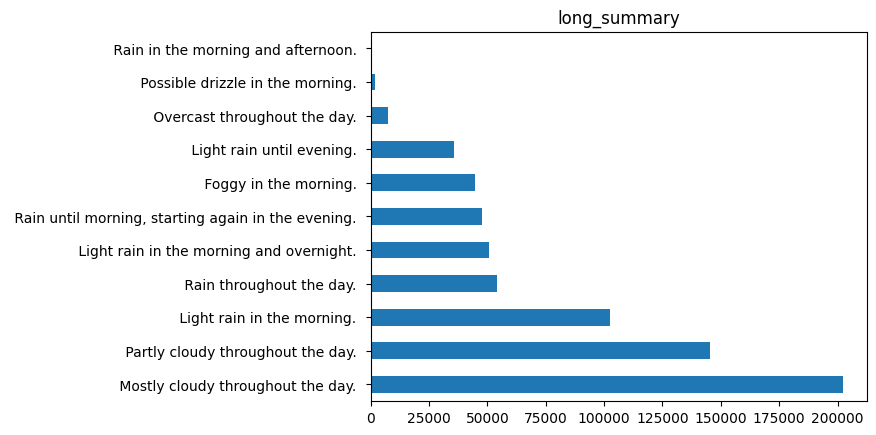

In [88]:
for column in df_categorical.columns:
    df_categorical[column].value_counts().plot(kind='barh')
    plt.title(column)
    plt.show()

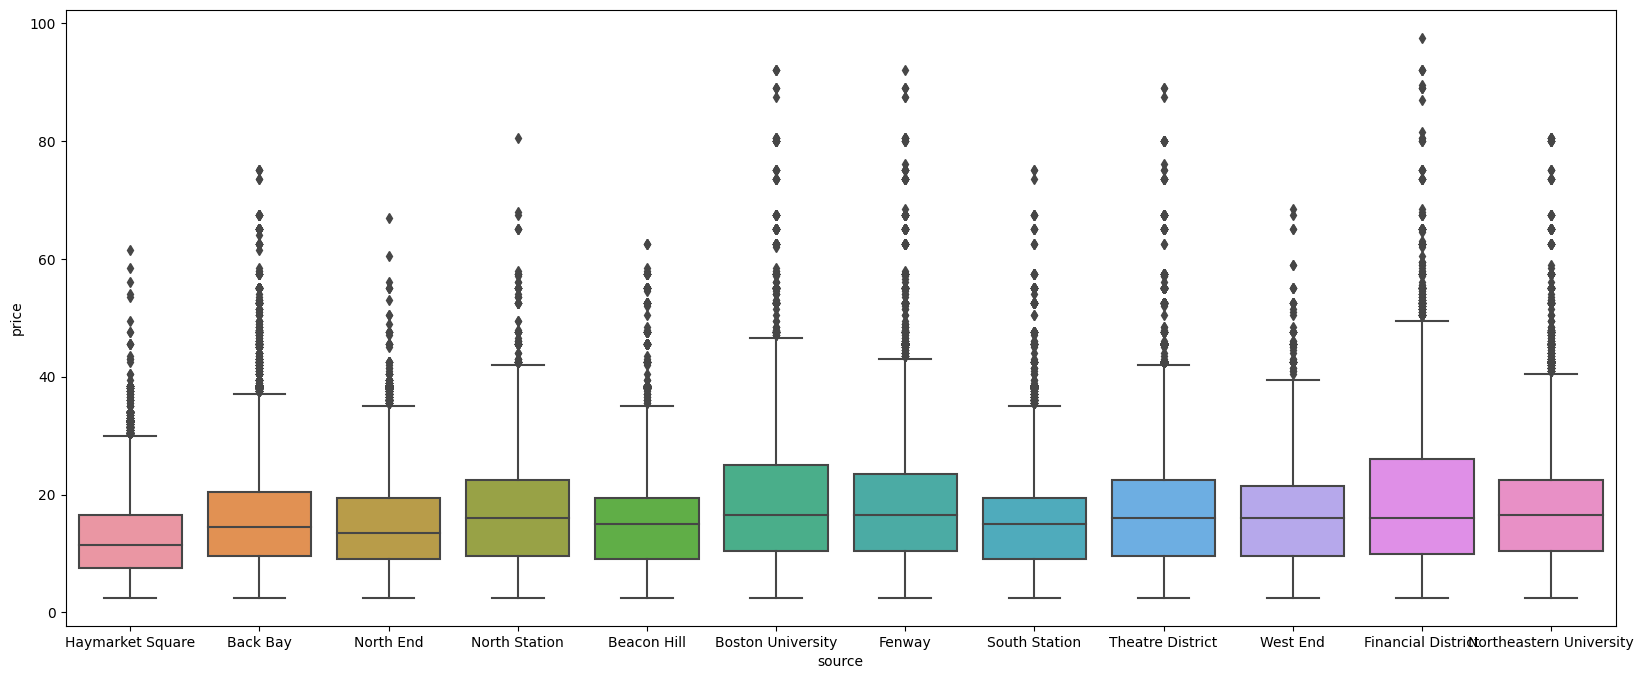

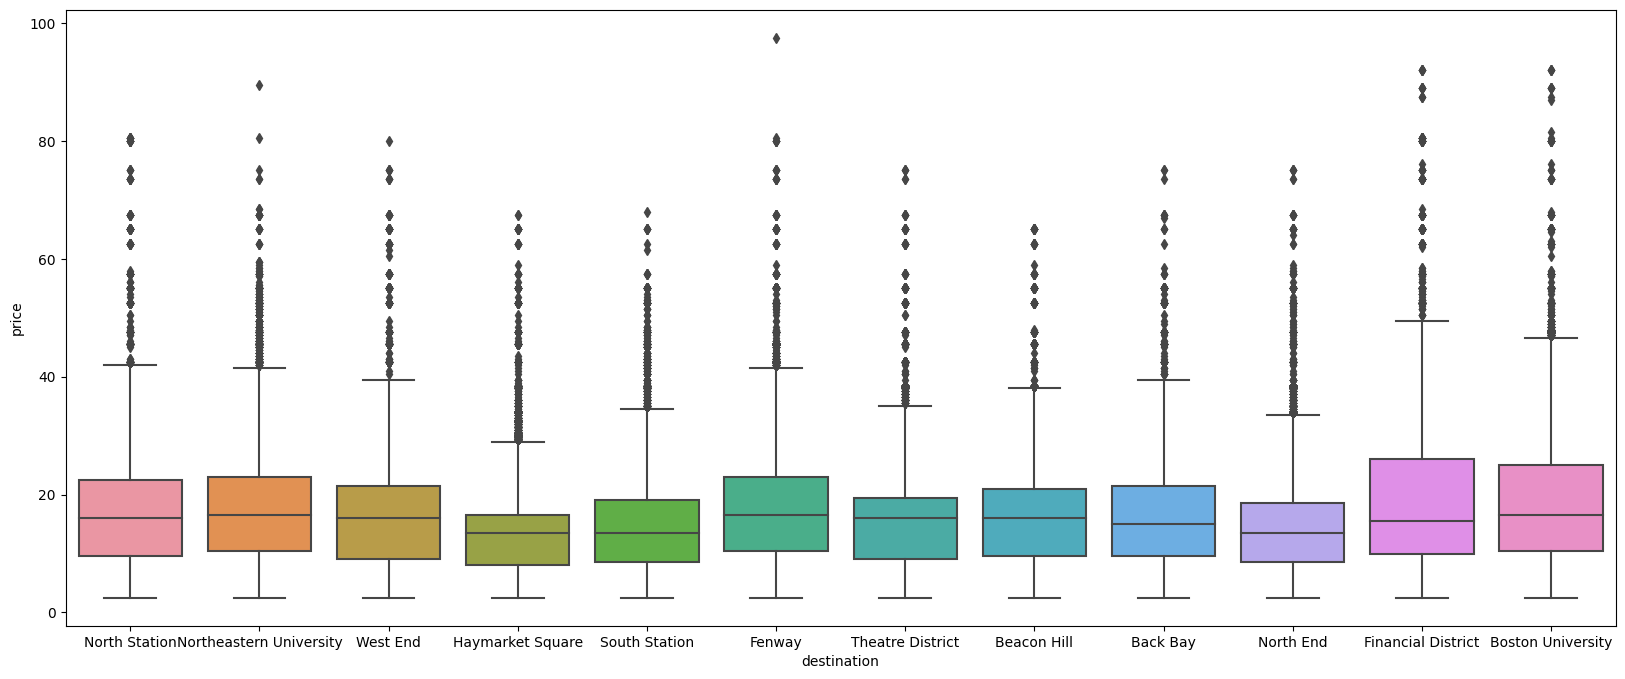

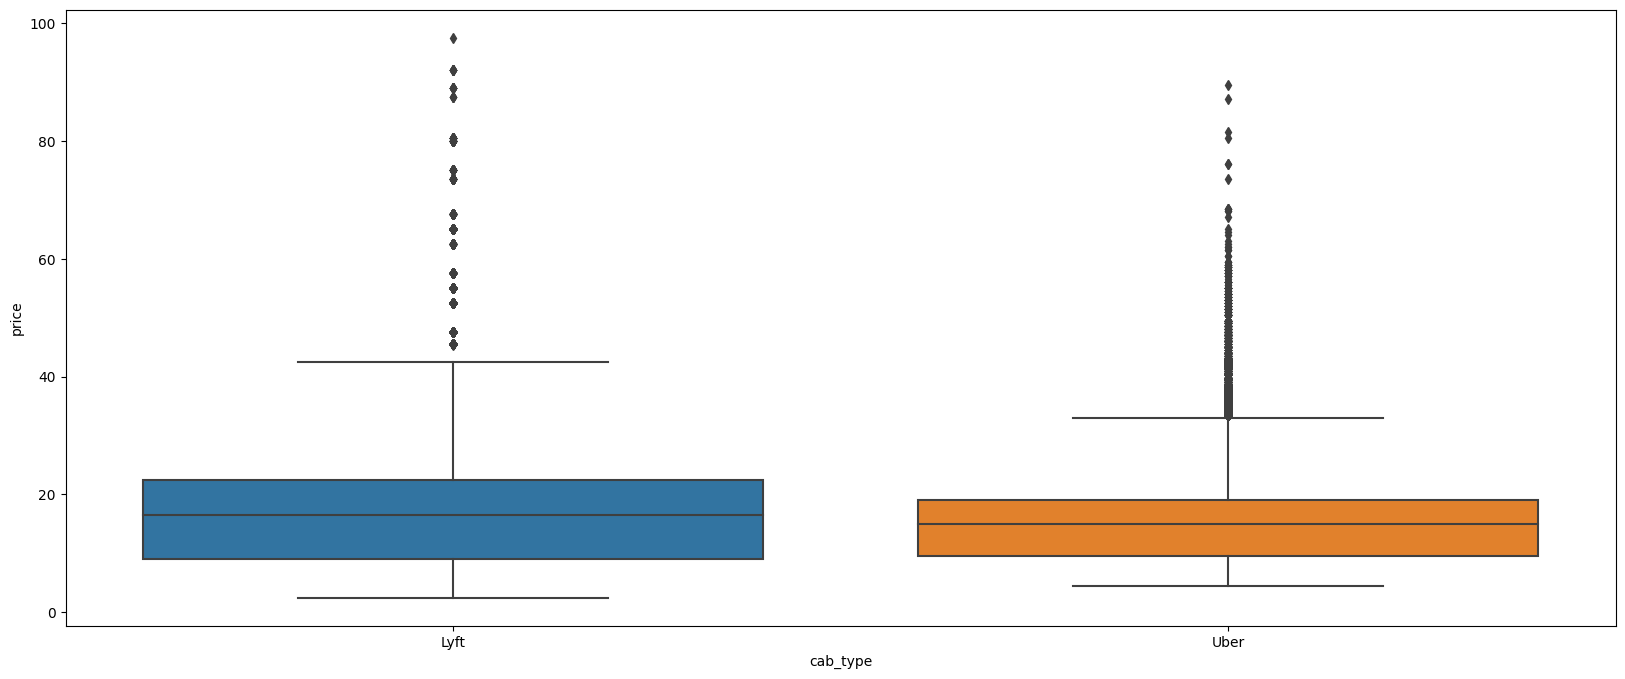

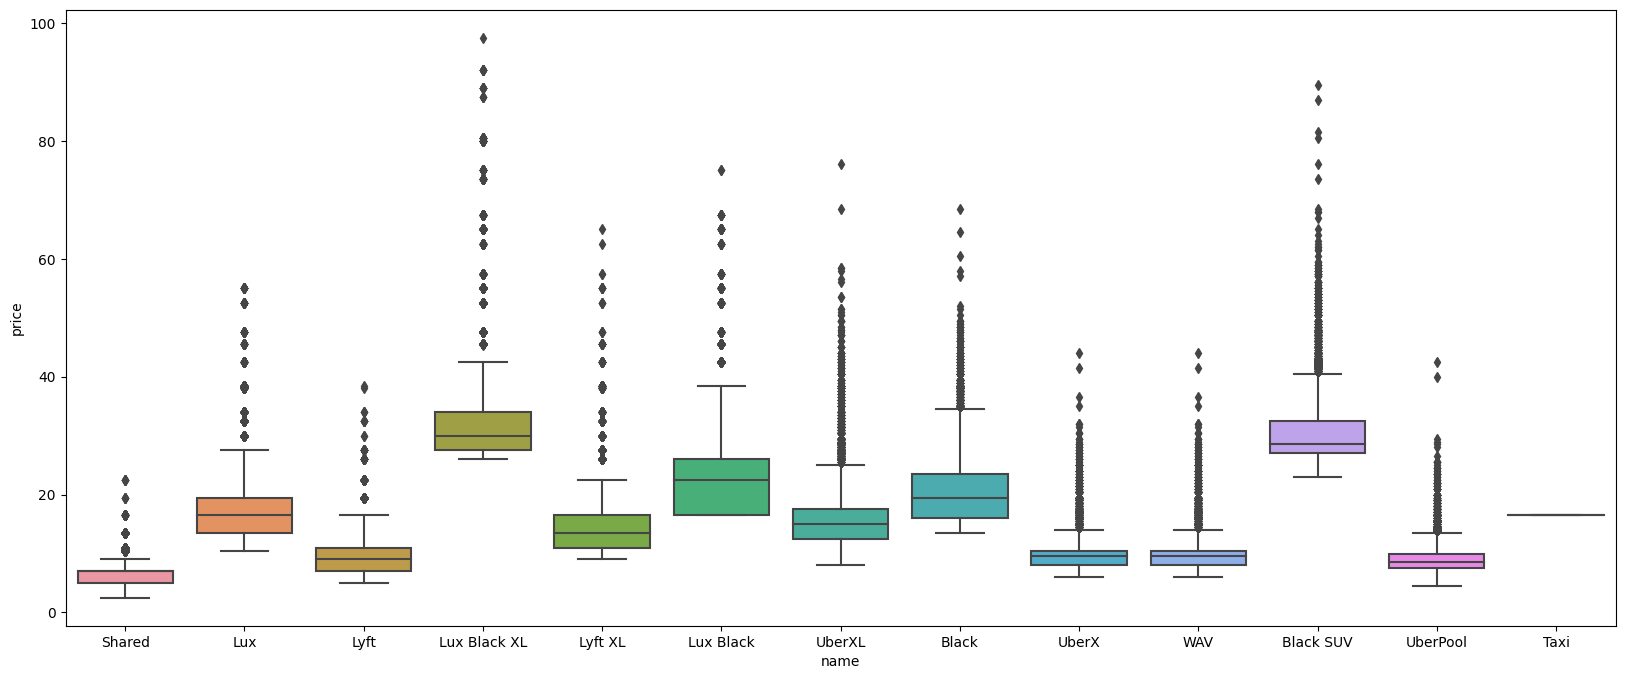

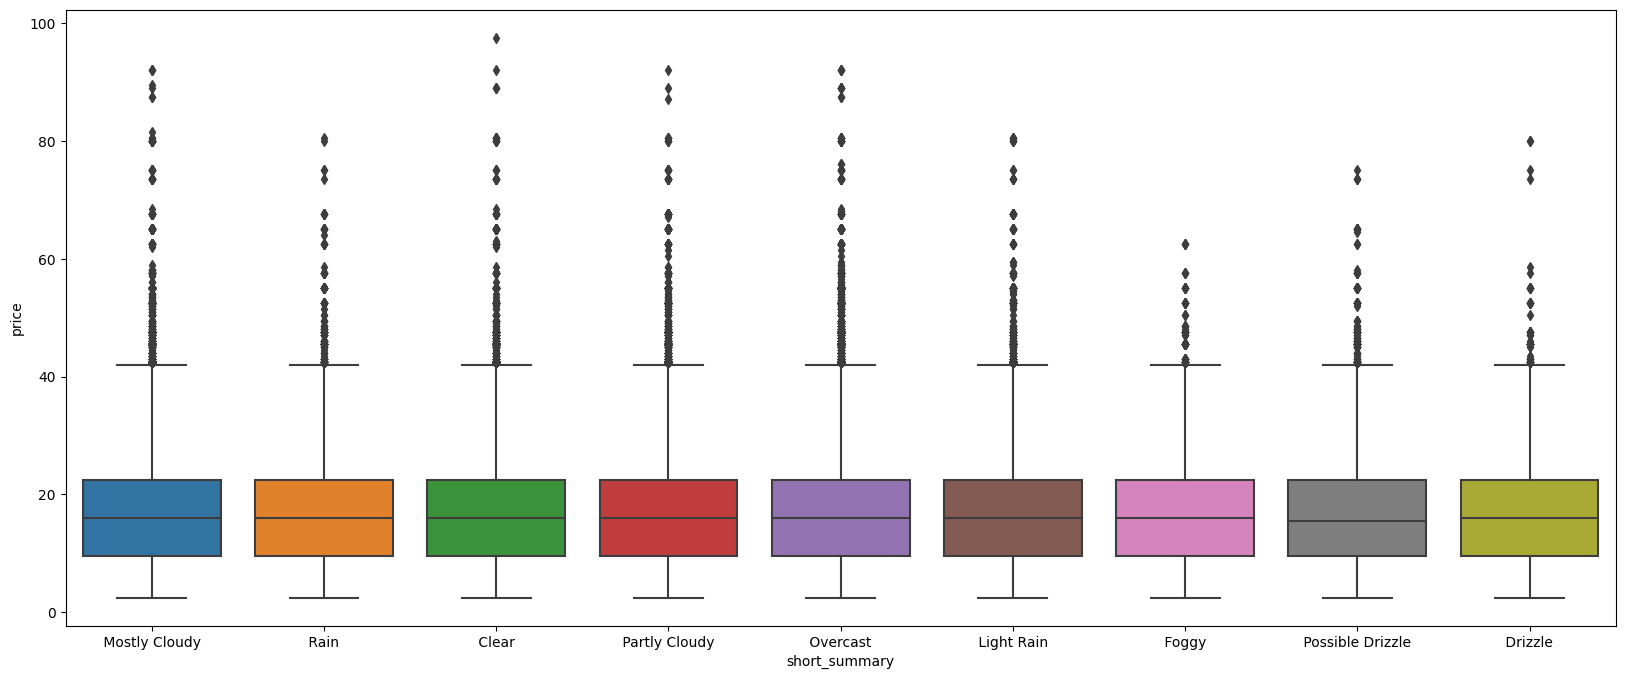

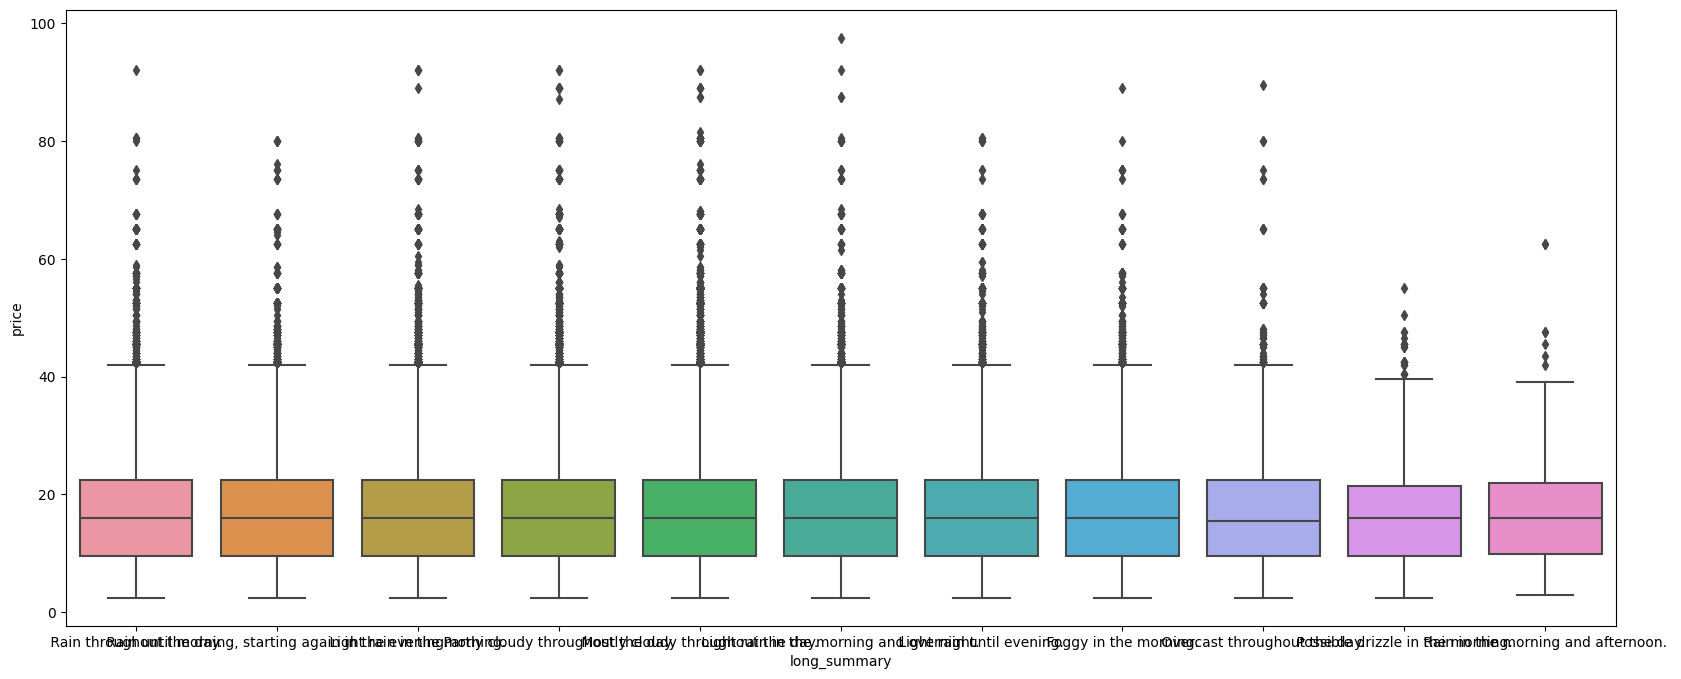

In [89]:
x = df[['source', 'destination', 'cab_type','name','short_summary','long_summary']]
y = df['price']

for categorical in x.columns:
    sns.boxplot(x=x[categorical], y=y, data=df)
    plt.gcf().set_size_inches((20,8))
    plt.show()

In [90]:
columns_continue = df.columns
columns_continue = [x for x in columns_continue if x not in ['source', 'destination', 'cab_type','name','short_summary','long_summary']]

In [91]:
len(columns_continue)

44

In [92]:
columns_continue

['timestamp',
 'hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

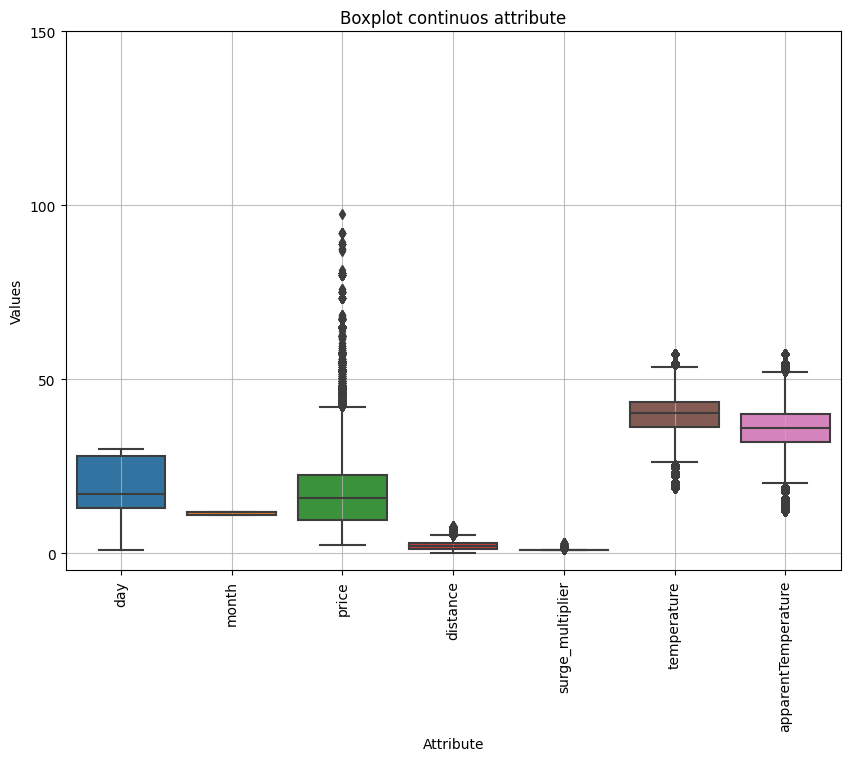

In [93]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['day','month', 'price', 'distance', 'surge_multiplier','temperature', 'apparentTemperature']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,200, 50))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()
# 'timestamp', 'day','month', 'price', 'distance', 'surge_multiplier','temperature', 'apparentTemperature',
# 'precipIntensity','precipProbability','humidity','windSpeed','windGust','windGustTime','visibility','temperatureHigh','temperatureHighTime''temperatureLow',
# 'temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime','dewPoint',
# 'pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase',
# 'precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin',
#'apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime'

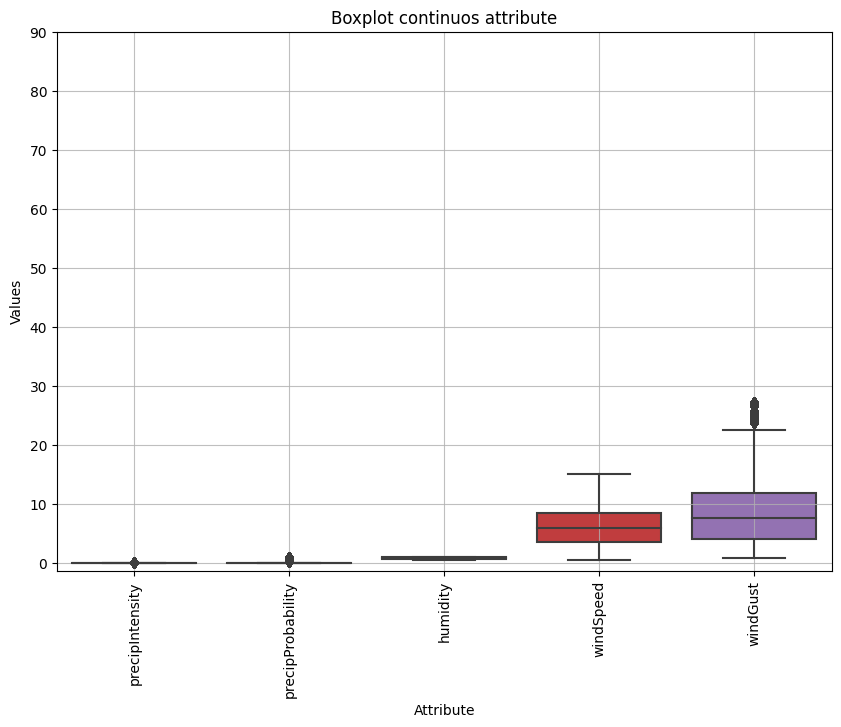

In [94]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['precipIntensity','precipProbability','humidity','windSpeed','windGust']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,100, 10))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

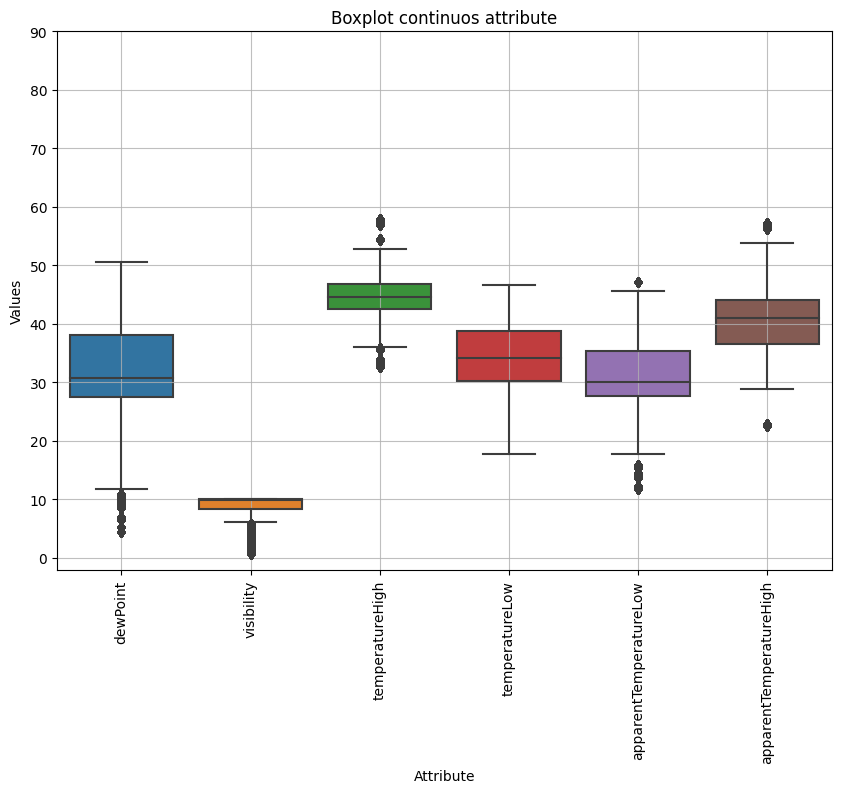

In [95]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[['dewPoint','visibility','temperatureHigh','temperatureLow', 'apparentTemperatureLow', 'apparentTemperatureHigh']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,100, 10))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

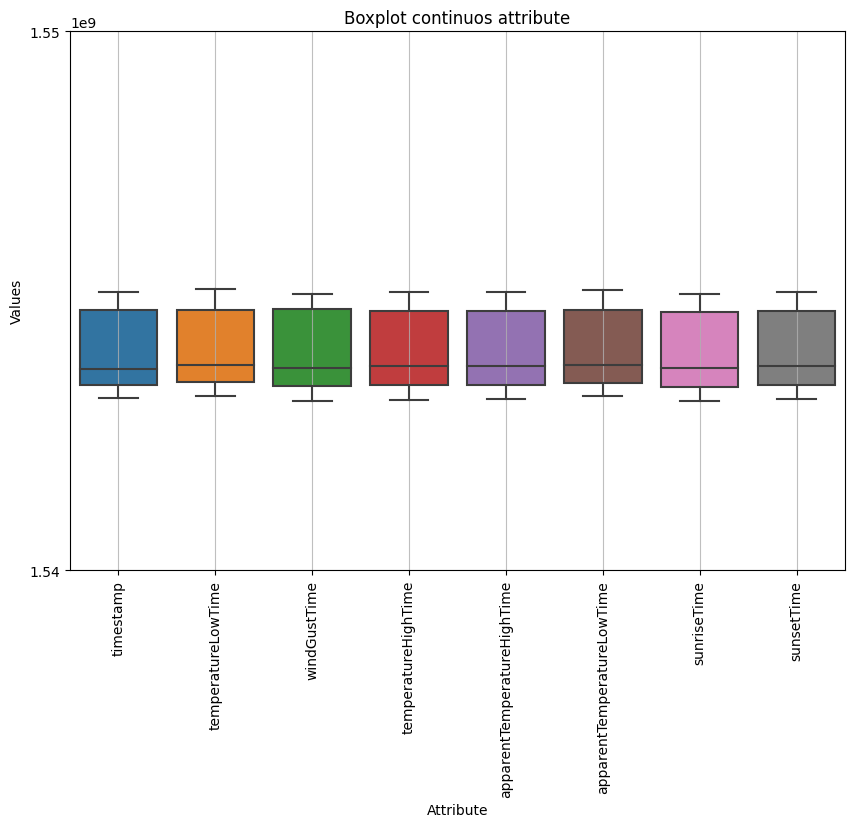

In [96]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[ ['timestamp','temperatureLowTime','windGustTime','temperatureHighTime','apparentTemperatureHighTime','apparentTemperatureLowTime', 'sunriseTime','sunsetTime']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(1540000000,1560000000, 10000000))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()

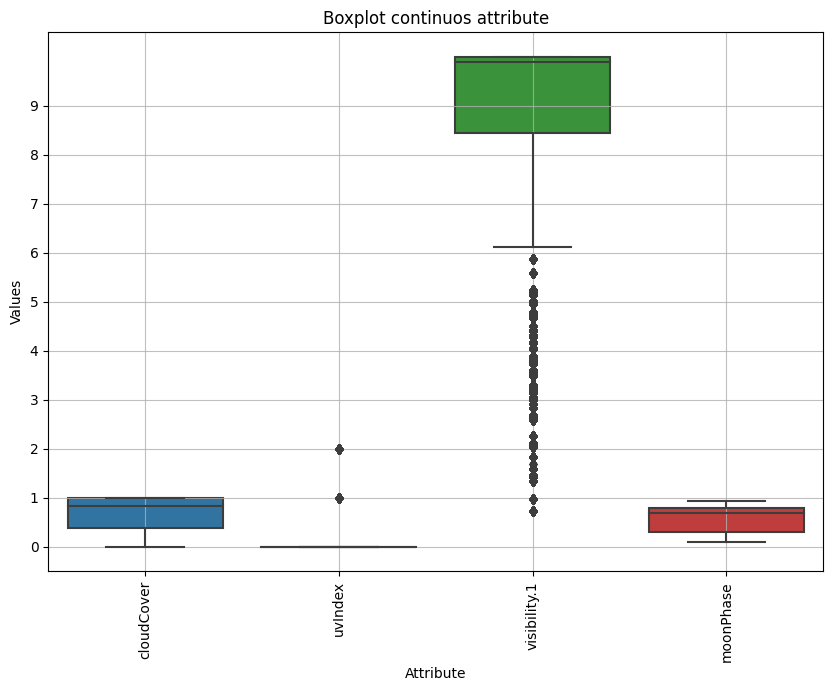

In [97]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[['cloudCover','uvIndex','visibility.1','moonPhase']])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,10, 1))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()


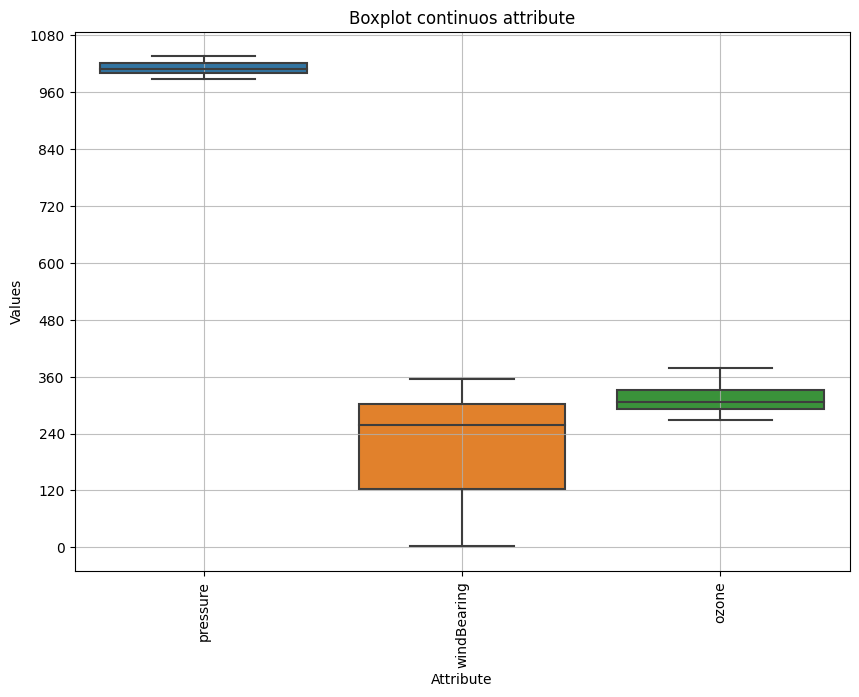

In [98]:
plt.figure(figsize=(10,7))
plt.title("Boxplot continuos attribute")
sns.boxplot(df[['pressure','windBearing','ozone',]])
plt.xlabel("Attribute")
plt.ylabel("Values")
plt.yticks(np.arange(0,1200, 120))
plt.xticks(rotation=90)
plt.grid(alpha=0.8)
plt.show()


**Convert Variabel Categorical to Numerik**

In [99]:
from sklearn.preprocessing import LabelEncoder

for column in df_categorical.columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [100]:
df['name'].unique()

array([ 7,  2,  5,  4,  6,  3, 11,  0, 10, 12,  1,  9,  8])

# MODELING

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   source                       693071 non-null  int32  
 5   destination                  693071 non-null  int32  
 6   cab_type                     693071 non-null  int32  
 7   name                         693071 non-null  int32  
 8   price                        693071 non-null  float64
 9   distance                     693071 non-null  float64
 10  surge_multiplier             693071 non-null  float64
 11  temperature                  693071 non-null  float64
 12  apparentTemperature          693071 non-null  float64
 13 

In [102]:
df_features = df.drop(['price'],axis=1)
# df['price'].astype(int)
# df['price'] = df['price'].apply(lambda x: x*100)
df_targets = df['price'].astype(int)
# df_targets = pd.cut(df_targets, bins=3, labels=[0, 1, 2]) 

df_features2 = df.drop(['distance'], axis=1)
df_targets2 = df['distance'].astype(int)

df_features3 = df.drop(['source'], axis=1)
df_targets3 = df['source']

df_features4 = df.drop(['destination'], axis=1)
df_targets4 = df['destination']

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.8, random_state=10)

In [105]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_features2, df_targets2, test_size=0.8, random_state=10)

In [106]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_features3, df_targets3, test_size=0.8, random_state=10)

In [107]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_features4, df_targets4, test_size=0.8, random_state=10)

In [108]:
print(X_train.shape, y_train.shape)

(138614, 49) (138614,)


In [109]:
print(X_train2.shape, y_train2.shape)

(138614, 49) (138614,)


In [110]:
print(X_train3.shape, y_train3.shape)

(138614, 49) (138614,)


In [111]:
print(X_train4.shape, y_train4.shape)

(138614, 49) (138614,)


In [112]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred_linear_regression = linear_regression.predict(X_test)
# accuracy_linear_regression = accuracy_score(y_test, y_pred_linear_regression)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
# print("Model accuracy score: {0:0.4f}", accuracy_linear_regression)
print("Model mse score: ", mse_linear_regression)

Model mse score:  39.75875928419111


In [113]:
from sklearn.linear_model import LinearRegression

linear_regression2 = LinearRegression()
linear_regression2.fit(X_train2, y_train2)

y_pred_linear_regression2 = linear_regression2.predict(X_test)
# accuracy_linear_regression = accuracy_score(y_test, y_pred_linear_regression)
mse_linear_regression2 = mean_squared_error(y_test2, y_pred_linear_regression2)
# print("Model accuracy score: {0:0.4f}", accuracy_linear_regression)
print("Model mse score: ", mse_linear_regression2)

c:\Users\Erika Winckler\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- distance
Feature names seen at fit time, yet now missing:
- price

  warnings.warn(message, FutureWarning)


Model mse score:  2.2081181236367313


In [114]:
from sklearn.linear_model import LinearRegression

linear_regression3 = LinearRegression()
linear_regression3.fit(X_train3, y_train3)

y_pred_linear_regression3 = linear_regression3.predict(X_test)
# accuracy_linear_regression = accuracy_score(y_test, y_pred_linear_regression)
mse_linear_regression3 = mean_squared_error(y_test3, y_pred_linear_regression3)
# print("Model accuracy score: {0:0.4f}", accuracy_linear_regression)
print("Model mse score: ", mse_linear_regression3)

c:\Users\Erika Winckler\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- source
Feature names seen at fit time, yet now missing:
- price

  warnings.warn(message, FutureWarning)


Model mse score:  12.74040529437694


In [115]:
from sklearn.linear_model import LinearRegression

linear_regression4 = LinearRegression()
linear_regression4.fit(X_train4, y_train4)

y_pred_linear_regression4 = linear_regression4.predict(X_test)
# accuracy_linear_regression = accuracy_score(y_test, y_pred_linear_regression)
mse_linear_regression4 = mean_squared_error(y_test4, y_pred_linear_regression4)
# print("Model accuracy score: {0:0.4f}", accuracy_linear_regression)
print("Model mse score: ", mse_linear_regression4)

c:\Users\Erika Winckler\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- destination
Feature names seen at fit time, yet now missing:
- price

  warnings.warn(message, FutureWarning)


Model mse score:  11.85760200055174


# Kesimpulan : 
Menurut saya menggunakan model distance sebagai model lebih sesuai dari pada model lainnya karena hasil Mean Squared Error (MSE) yang didapatkan lebih kecil dibandingkan model yang lainnya.

In [116]:
# # Modelnya ga bisa digunakan karna value Y adalah float
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

# y_pred_gnb = gnb.predict(X_test)

# accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
# mse_gnb = mean_squared_error(y_test, y_pred_gnb)
# print("Model accuracy score: {0:0.4f}", accuracy_gnb)
# print("Model mse score: ", mse_gnb)

In [117]:
# from sklearn.neighbors import KNeighborsRegressor
# K=3
# knn = KNeighborsRegressor(n_neighbors=5)
# knn.fit(X_train, y_train)

# y_pred_knn = knn.predict(X_test)
# # accuracy_knn = accuracy_score(y_test, y_pred_knn)
# mse_knn = mean_squared_error(y_test, y_pred_knn)
# # print("Model accuracy score: {0:0.4f}", accuracy_knn)
# print("Model mse score: ", mse_knn)

In [118]:
# from sklearn.ensemble import RandomForestRegressor

# for x in np.arange(1,9,1):
#     rm = RandomForestRegressor(n_estimators=x)
#     rm.fit(X_train, y_train)
#     y_pred_random_forest = rm.predict(X_test)
#     # accuracy_random_forest= accuracy_score(y_test, y_pred_random_forest)
#     mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
#     # print("Model accuracy score: {0:0.4f}", accuracy_random_forest)
#     print("Model mse score: ", mse_knn)


In [119]:
# from sklearn.tree import DecisionTreeRegressor
# reg = DecisionTreeRegressor(max_depth=10)
# reg.fit(X_train, y_train)

# y_pred_reg = reg.predict(X_test)
# # accuracy_reg= accuracy_score(y_test, y_pred_reg)
# mse_reg = mean_squared_error(y_test, y_pred_reg)
# # print("Model accuracy score: {0:0.4f}", accuracy_reg)
# print("Model mse score: ", mse_reg)

In [120]:
# #modelnya gk bisa karna tipe datanya continuous
# from sklearn.linear_model import LogisticRegression

# logistic_regression = LogisticRegression()
# logistic_regression.fit(X_train, y_train)

# y_pred_lr = logistic_regression.predict(X_test)
# accuracy_lr= accuracy_score(y_test, y_pred_lr)
# mse_lr = mean_squared_error(y_test, y_pred_lr)
# print("Model accuracy score: {0:0.4f}", accuracy_lr)
# print("Model mse score: ", mse_lr)

In [121]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# naive_bayes = GaussianNB()
# naive_bayes.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred_nb = naive_bayes.predict(X_test)
# accuracy_nb= accuracy_score(y_test, y_pred_nb)
# mse_nb = mean_squared_error(y_test, y_pred_nb)
# print("Model accuracy score: {0:0.4f}", accuracy_nb)
# print("Model mse score: ", mse_nb)


In [122]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_train)

# # Display the confusion matrix using a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [123]:
# eror
# # from sklearn.svm import SVC

# # svm = SVC()
# # svm.fit(X_train, y_train)

# # y_pred_svm = svm.predict(X_test)
# # accuracy_svm= accuracy_score(y_test, y_pred_svm)
# # mse_svm = mean_squared_error(y_test, y_pred_svm)
# # print("Model accuracy score: {0:0.4f}", accuracy_svm)
# # print("Model mse score: ", mse_svm)